In [1]:
import numpy as np
import jax
import jax.numpy as jnp
from jax import vmap
import matplotlib.pyplot as plt
from qdots_qll.models import game

In [3]:
model = game.physical_model()
true_pars = game.true_pars


In [31]:
times = jnp.linspace(0, 60, 1000)

In [33]:
norm_fim_times = vmap(
    lambda a: jnp.linalg.norm(model.fim(true_pars, a)), in_axes=(0)
)(times)

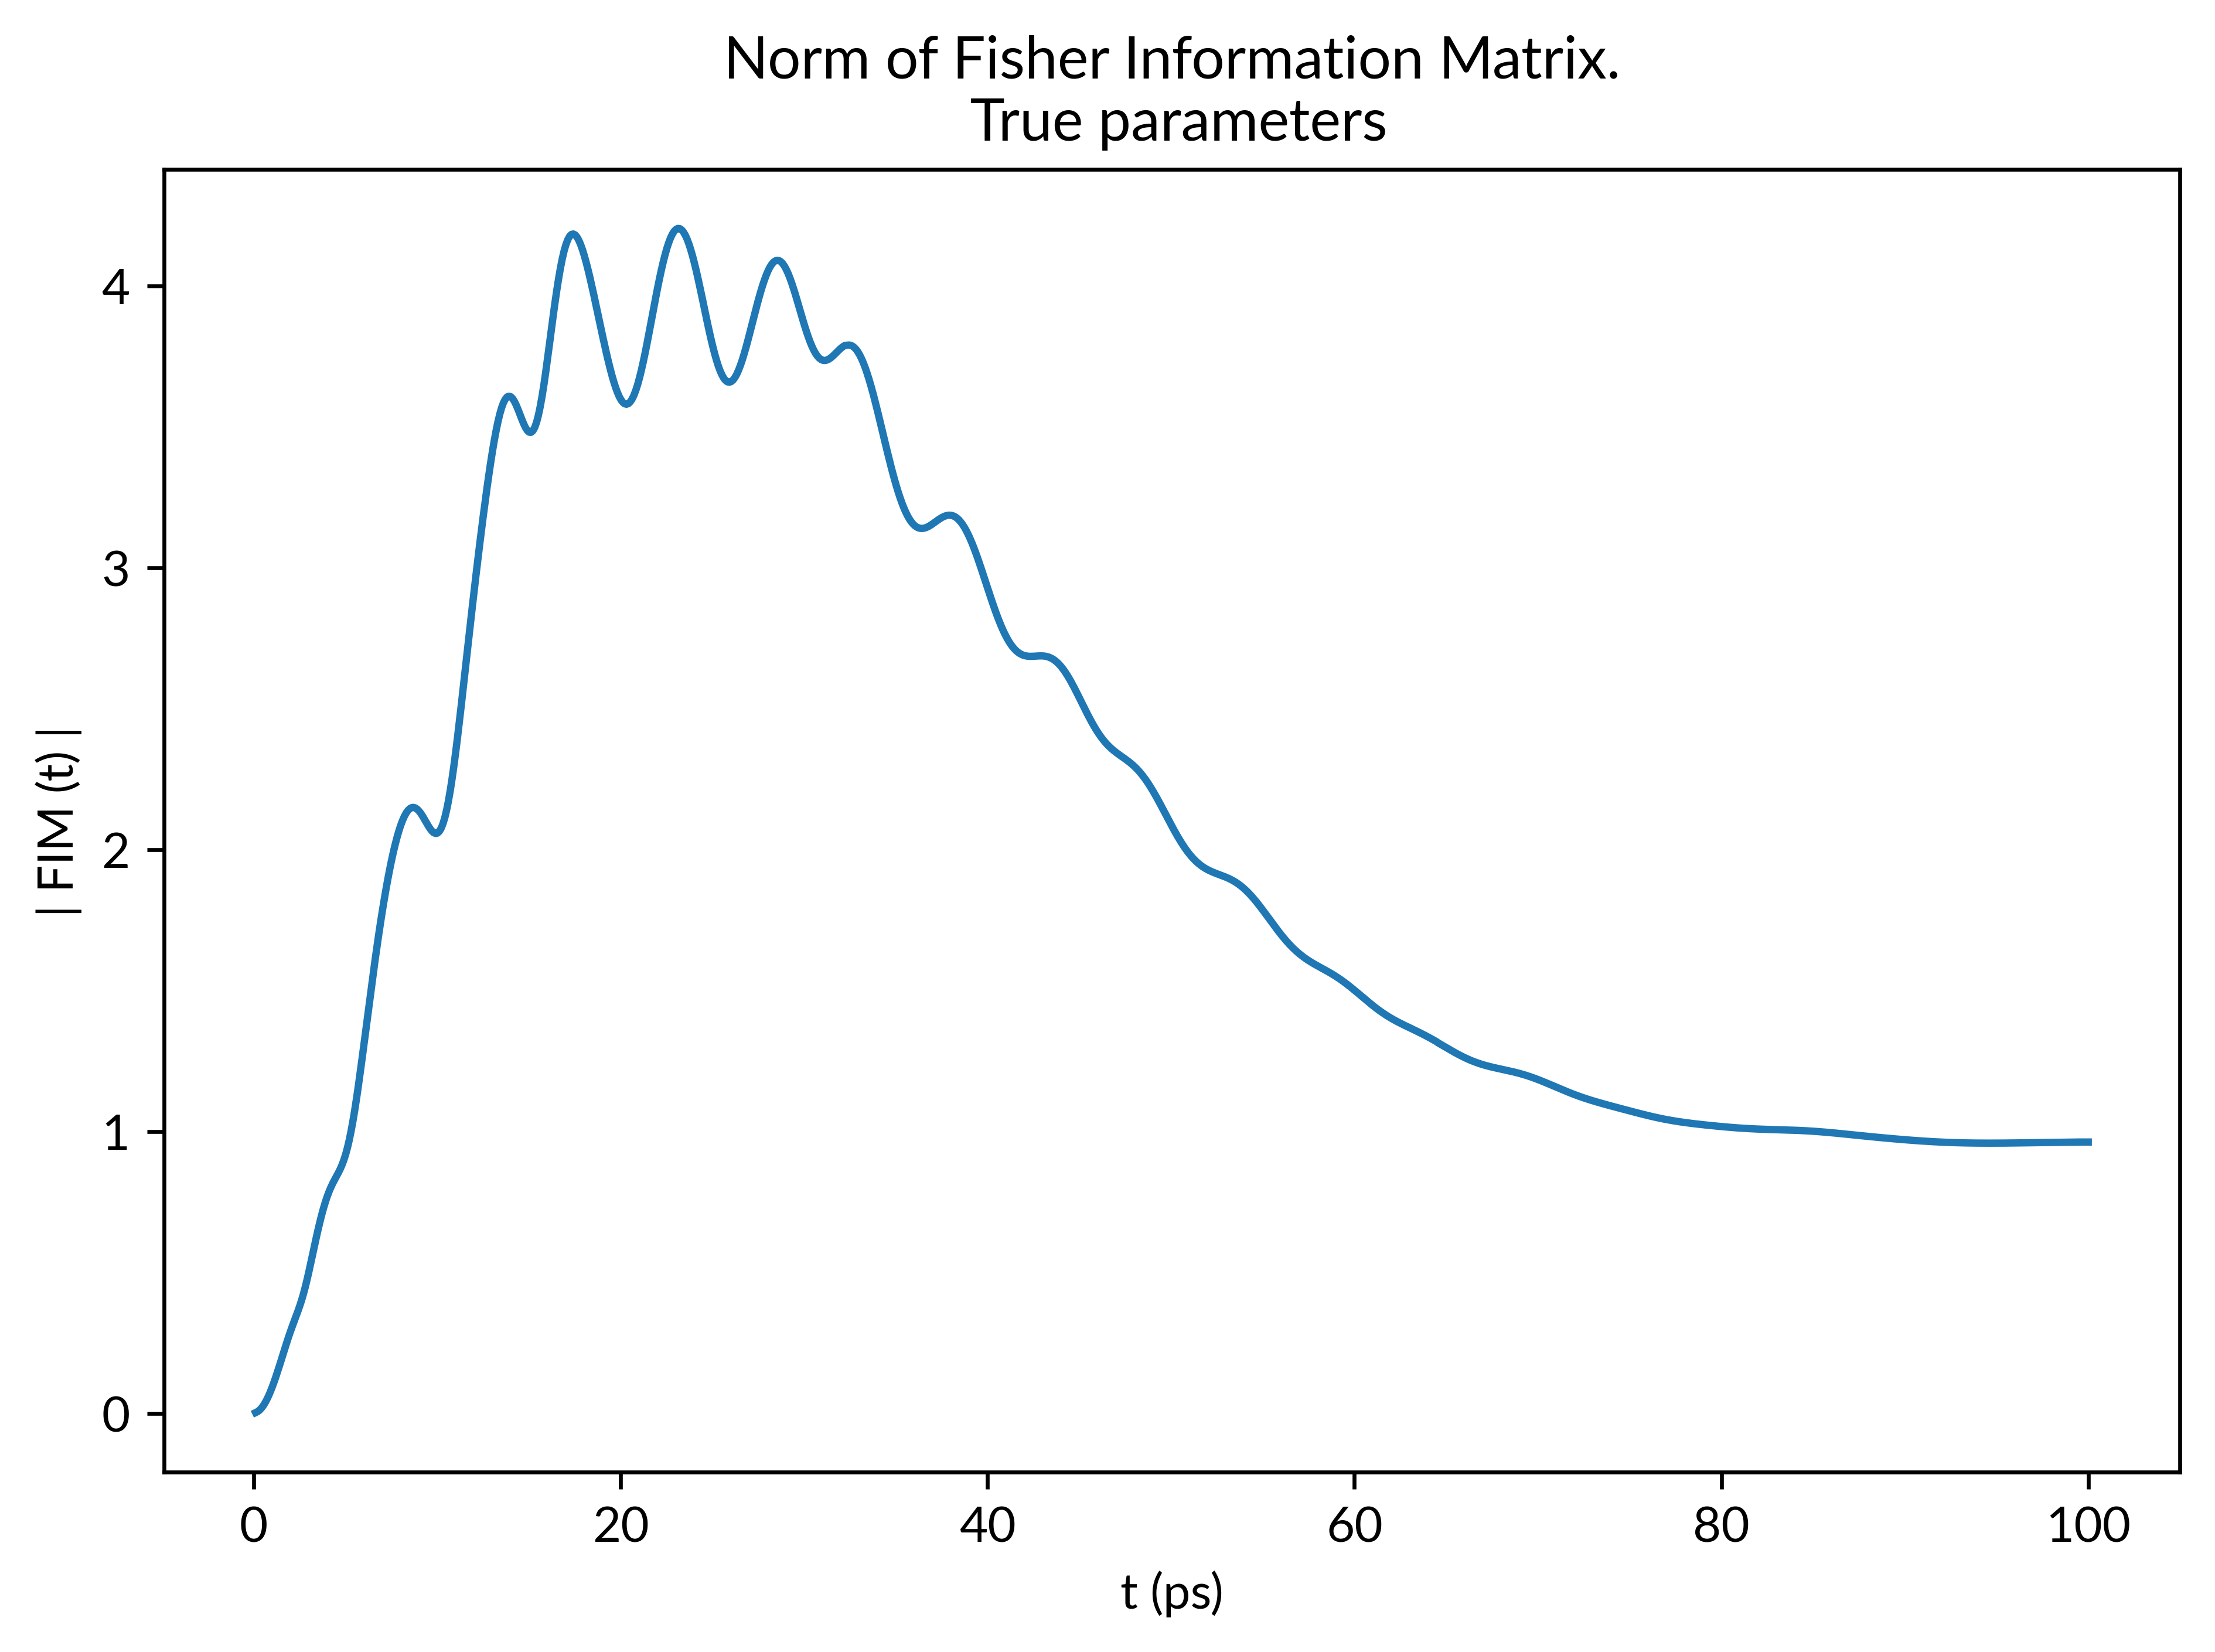

In [7]:
import matplotlib

import matplotlib.font_manager as font_manager

# Add every font at the specified location
font_dir = ['/Users/darioradecic/Downloads/Merriweather']
for font in font_manager.findSystemFonts(font_dir):
    font_manager.fontManager.addfont(font)

# font_manager.get_font_names()


from matplotlib import rcParams
rcParams['font.family'] = 'Lato'




plt.figure(dpi=600)
plt.plot(times, norm_fim_times)
plt.xlabel("t (ps)")
plt.ylabel(" | FIM (t) | ")
plt.title("Norm of Fisher Information Matrix.\n True parameters")
plt.tight_layout()

# plt.savefig("determinant_FIM_true.pdf", dpi=600)
plt.show()

In [25]:
time_candidates = np.random.uniform(0.0001, 60, 20)

In [19]:
from qdots_qll.times_proposals import maximize_fim_time

In [26]:
times_optimized = vmap(maximize_fim_time, in_axes=(0, None, None, None))(
        time_candidates, true_pars, model, 0.5
    )

In [27]:
norm_fim_candidates = vmap(
    lambda a: jnp.linalg.norm(model.fim(true_pars, a)), in_axes=(0)
)(time_candidates)

norm_fim_optimized = vmap(
    lambda a: jnp.linalg.norm(model.fim(true_pars, a)), in_axes=(0)
)(times_optimized)

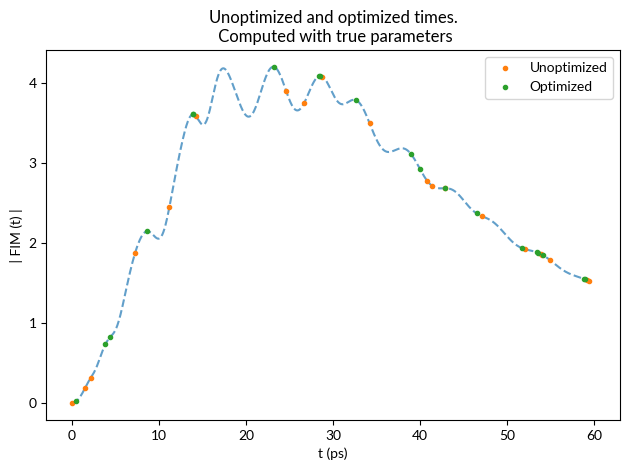

In [36]:
# Add every font at the specified location
font_dir = ['/Users/darioradecic/Downloads/Merriweather']
for font in font_manager.findSystemFonts(font_dir):
    font_manager.fontManager.addfont(font)

# font_manager.get_font_names()


from matplotlib import rcParams
rcParams['font.family'] = 'Lato'



plt.plot(times, norm_fim_times, "--", alpha=0.7)
plt.plot(time_candidates, norm_fim_candidates, '.', label="Unoptimized")
plt.plot(times_optimized, norm_fim_optimized, ".", label="Optimized")
plt.legend()

plt.xlabel("t (ps)")
plt.ylabel(" | FIM (t) | ")
plt.title("Unoptimized and optimized times.\n Computed with true parameters")
plt.tight_layout()
plt.savefig("times_optimization_example.pdf", dpi=600)
plt.show()